# Lesson 02 - The Artificial Neuron

### The following topics are discussed in this notebook:
* Motivation behind neural networks. 
* Architecture of the artificial neuron. 
* Loss functions and training. 

### Additional Resources
* **Hands-On Machine Learning**, Chapter 10, Pages 253 - 260


## What is a Neural Network?

Neural networks are a class of machine learning algorithms that are inspired by neurons, the nerve cells that serve as the primary components of the central nervous system. Neurons are the most basic structure in the nervous system that is capable of processing information, and all information flowing through the central nervous system is processed by networks of interconnected neurons. The human brain contains approximately 100 billion neurons. 

At its most basic level, the function of a neuron is to recieve signals from many other neurons as input, aggregate and process those signals, and then send a signal downstream to other neurons. Every thought, memory, or perception you will ever have is represented in the brain by a specific pattern of neurons firing. 

Neurons are incredibly versatile. Your brain has clusters of neurons that are dedicated to specific tasks, but in the case of a brain injury, neurons in other areas of the brain are able to adjust their activity to compensate for those in the injured area. This is a concept known as **neuroplasticity**. 

The flexibility of a neuron is the motivation behind a neural network. If we can emulate the behavior of a neuron, then perhaps we can connect them into massive networks to perform information processing tasks similar to what occurs in the human brain. 

With this motivation in mind, we will start by discussing the **artificial neuron** (also called a **logistic regression** model), a machine learning algorithm loosely inspired by the neuron.


![Neuron](Images/02_neuron.jpg)

## Preliminary: The Sigmoid Function

The **sigmoid** or **logit** function is given by the following formula:

$$\Large \sigma(z) = \frac{e^z}{1+e^z} = \frac{1}{1 + e^{-z}}$$

A plot of the sigmoid function is shown below.

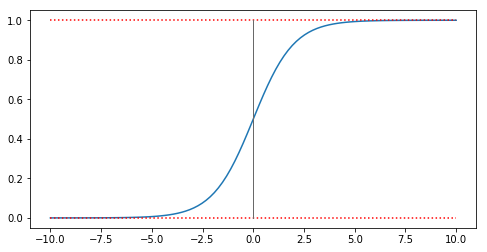

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.linspace(-10,10,100)
y = 1 / (1 + np.exp(-x))

plt.close()
plt.figure(figsize=(8,4))
plt.plot(x,y)
plt.plot([-10,10],[1,1], linestyle=':', c="r")
plt.plot([-10,10],[0,0], linestyle=':', c="r")
plt.plot([0,0],[0,1], linewidth=1, c="dimgray")
plt.show()

Since the output of a sigmoid function is always between 0 and 1, it is useful for modeling probabilities. 

## The Artificial Neuron (Logistic Regression)

An **artificial neuron** is a classification algorithm that takes in one or more features as inputs, and it outputs a probability distribution over the possible classes of the target variable. In other works, for each possible class that observation could belong to, the neuron model will generate a probability of the observation belonging to that class. 

Assume for now that we considering a binary classification problem (i.e. a classification problem with only two possible classes). Let `y` represent the target variable, which takes on values of 0 or 1. Assume that we have `k` features, denoted by $x^{(1)}, x^{(2)}, ..., x^{(k)}$. Let $p$ denote the probability that a particular observation belongs to Class 1. We wish for our neuron model to be able to estimate the value of $p$ given values for the features $x^{(1)}, x^{(2)}, ..., x^{(k)}$. As such, our neuron will represent a function $f$ with the following form:

$$\Large f\left(x^{(1)}, x^{(2)}, ..., x^{(k)}\right) = p = P\left[y = 1 \right]$$

The function $f$ will be calculated by performing the followig steps:

1. Assume that we have $k+1$ **weights** associated with our model. Denote these by $w_0, w_1, ... , w_k$. 
2. Use the weights and the features to calculate the following weighted sum: $z = w_0 + w_1 x^{(1)} + ... + w_k x^{(k)}$. 
3. Plug $z$ into the **sigmoid** function $\large\sigma(z) = \frac{1}{1 + e^{-z}}$.
4. The resulting value is equal to $p$. 

Bringing all of this together, we get the following definition for our prediction function $f$:

$$\Large f\left(x^{(1)}, x^{(2)}, ..., x^{(k)}\right) = p = \frac{1}{1 + e^{-(w_0 + w_1 x^{(1)} + ... + w_k x^{(k)})}} =  p = P\left[y = 1 \right]$$

It is convenient to use a diagram to represent the calculation performed by neuron. An example with two inputs is shown below. 


![AN](Images/02_AN.jpg)

# Example of using an Artificial Neuron to Make Predictions

Assume that we have a dataset consisting of 5 observations. Each observation has two features, $x^{(1)}$ and $x^{(2)}$, and a single categorical label of "red" or "blue". We will encode these categories into a target variable $y$ so that $y=0$ for observations in the red class, and $y=1$ for observations in the blue class. 

A plot of our dataset is provided below.


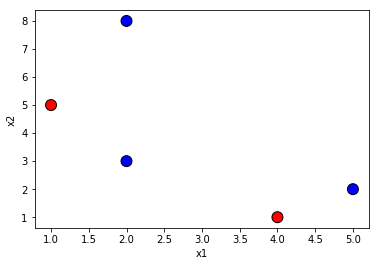

In [2]:
x1 = np.array([1, 2, 2, 4, 5])
x2 = np.array([5, 8, 3, 1, 2])
col = np.array(['r','b','b','r','b'])
y = np.array([0, 1, 1, 0, 1])

plt.scatter(x1, x2, c=col, s=120, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Assume we want to use this (incredibly tiny) dataset to create a neuron model that we could use to predict whether new observations were "red" or "blue" based on their values of $x^{(1)}$ and $x^{(2)}$. 

For us to have a useable model, we need to know the values of the weights $w_0$, $w_1$, and $w_2$. For now, we will arbitrarily set the weights to have the following values:

$$\large w_0 = -1.2, \hspace{1 cm} w_1 = -0.8, \hspace{1 cm}  w_2 = 0.5$$

These weights produce the neuron pictured below.

![FP](Images/02_weights.jpg)

As mentioned, we would like to be able to use this model to be able to make predictions regarding the class of new points whose classes are unknown to us. But first, we should probably see how well it performs on the 5 points whose classes we do already know. 

We will plug the features $x^{(1)}$ and $x^{(2)}$ into the model for each of the points. If the predicted probability $p$ comes back as being greater than or equal to 0.5, then we will say that the model predicted that the point was blue. Otherwise, we will say that the model predicted that the point was red. 

Let's see how this process works with the blue point at $x^{(1)}=2$, $x^{(2)}=8$.

![Net01](Images/02_FP.jpg)

We ended up with $p = 0.769$. Since $p >= 0.5$, the model predicts that the point is blue, which is correct! But, before we celebrate, we should probably see how well the model performs on the other four points. We will use numpy to calculate the predictions for all five points, and will summarize the results in a dataframe. 

In [3]:
import pandas as pd 

z = -1.2 - 0.8 * x1 + 0.5 * x2
p = 1 / (1 + np.exp(-z))
pred = np.where(p >= 0.5, "b", "r")
cor = pred == col

results = pd.DataFrame({'x1':x1, 'x2':x2, 'class':col, 'p':p, 'pred_class':pred, 'correct':cor})
results

,x1,x2,class,p,pred_class,correct
0,1,5,r,0.622459,b,False
1,2,8,b,0.768525,b,True
2,2,3,b,0.214165,r,False
3,4,1,r,0.019840,r,True
4,5,2,b,0.014774,r,False


It appears that our model made correct predictions for only 2 of the 5 points, for an accuracy of 40%. That is a worse than random guessing would achieve on average. It appears that we need to find a new model. Since the weights determine the output of our model, finding a new model amounts to finding new weights. 

## Loss Functions

If we are going to consider alternate models, it would be useful to have a method of scoring each model so that we can determine which model is the best (at least, according to our scoring method). Such a scoring method is called an **objective function**. In this course, we will typically work with objective functions for which a low score is better. Such objective functions are typically referred to as **loss functions**. 

For classification problems of this type, we will use **negative log-likelihood**, also referred to as **cross-entropy**, as our loss function. We will now explain how this loss function is calculated. 

# Negative Log-Likelihood (Cross-Entropy)

Assume that we have a binary classification problem in which the labels $y_i$ are encoded as 0 or 1. Suppose we have a model represented by a function $f\left(x^{(1)}, x^{(2)}, ..., x^{(k)}\right) = p = P\left[y = 1 \right]$. The negative log-likelihood loss function for such a model is calculated as follows:

1. Calculate $p_i$ for each observation in the dataset. 
2. For each $i$, define $\pi_i$ as follows: $
\quad\pi_i = \left\{
        \begin{array}{ll}
            p_i & \text{if  } y_i = 1 \\
            1 - p_i & \text{if  } ~y_i = 0
        \end{array}
    \right.$
    
3. Then $\pi_i$ is the estimate our current model provides for the probability that observation $i$ falls into its actual observed class. We would like for each of these values to be as large as possible. 

4. The **likelihood** score for the model is given by: $L = \pi_1 \cdot \pi_2 \cdot ... \cdot \pi_n$. We prefer models with a higher likehood score. 

5. From a computational standpoint, it is better to work with the natural log of the likelihood, which is referred to as the **log-likelihood**. This score is calculates as follows: $LL = \ln L = \ln(\pi_1) + \ln(\pi_2) + ... + \ln(\pi_n)$. As with likelihood, we prefer models with a higher log-likelihood.

6. Since each $\pi_i$ is between 0 and 1, each $\ln(\pi_i)$ will be negative, and hence $LL$ will be negative. To produce a positive score we will negative the log-likelihood, which will result in **negative log-likelihood** or **cross-entropy**. Since we would like to maximize log-likelihood, we wish to minimize **cross-entropy**.

Let's see how this works with our previous example. Adding a column for $\pi_i$, we get:

In [4]:
pi = np.where(y ==1, p, 1-p)

results = pd.DataFrame({'x1':x1, 'x2':x2, 'class':col, 'p':p, 'pi':pi})
results

,x1,x2,class,p,pi
0,1,5,r,0.622459,0.377541
1,2,8,b,0.768525,0.768525
2,2,3,b,0.214165,0.214165
3,4,1,r,0.019840,0.980160
4,5,2,b,0.014774,0.014774


We can calculate the negative log-likelihood as follows:

In [5]:
NLL = -np.sum(np.log(pi))
print(NLL)

7.013291927283446


This value does not tell us much on its own, but we can use it to compare the performance of this model against other models. 

## Training a Neuron Model

Now that we have a method for scoring models, we can tweak the weights in our model and monitor the effect that this has on the loss score. In this example, we will manually tune the weights, but in practice we would use a method called gradient descent to update the weights in a methodical way. We will discuss gradient descent in more detail later in this course. 

In [6]:
%matplotlib inline
%run -i Snippets/snippet04.py

## Finding Optimal Weights with Scikit-Learn

We can use Scikit-Learn to train a logistic regression classifier on the data to find the optimal values for the weight parameters. 

In [7]:
from sklearn.linear_model import LogisticRegression

X = np.hstack((x1.reshape(5,1),x2.reshape(5,1)))

mod = LogisticRegression(C=1e1000, solver='lbfgs')
mod.fit(X, y)

print(mod.intercept_)
print(mod.coef_)

[-5.76181927]
[[1.15894267 0.86913785]]


## Finding Optimal Weights with Keras
In this course, we will primarily be using the package Keras to build and train neural networks. The code cell below implements a single-neuron model in Keras. We will explain this code in more detail later in the course. 

In [8]:
from keras import models
from keras.optimizers import Adam, SGD
from keras.layers import Dense
from tensorflow import set_random_seed

np.random.seed(1)
set_random_seed(1)

model = models.Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(2,)))

opt = Adam(lr=0.1)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=500, batch_size=5, shuffle=True, verbose=0)

print(model.get_weights()[1])
print(model.get_weights()[0])

Using TensorFlow backend.


[-5.761798]
[[1.1589386]
 [0.8691356]]


## Limitations of Neuron Models

Despite being a relatively simply model, single-neuron models can be quite useful. Logistic regression is an effective tool for many classification problems. However, it does have its limitations. For example, a logistic regression model is only able to learn linear decision boundaries, as indicated by the following string of equations:

$$\large \left( p = \frac{1}{1 + e^{-z}} = 0.5 \right) \implies \left( z = 0 \right) \implies \left( w_0 + w_1 x_1 + w_2 x_2 = 0 \right)$$

Given this limitation, a single-neuron model would not be useful in tackling either of the classification problems shown below. 

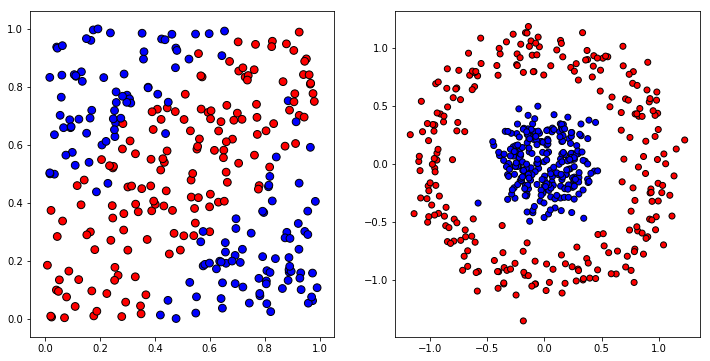

In [9]:
from sklearn.datasets import make_circles

np.random.seed(887)
Z = np.random.uniform(0,1,[300,2])
pB = 40*np.abs(Z[:,0] - Z[:,1])**4
pR = np.random.uniform(0,1,300)
col = np.where(pB < pR, 'r', 'b')

np.random.seed(1)
X, y = make_circles(500, factor=0.25, noise=0.12)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Z[:,0], Z[:,1], c=col, edgecolor='k', s=60)
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr_r', edgecolor='k')
plt.show()